In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

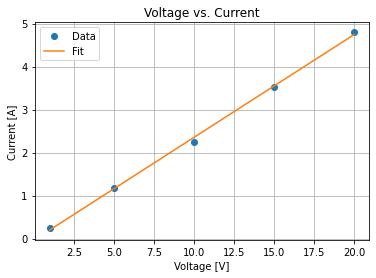

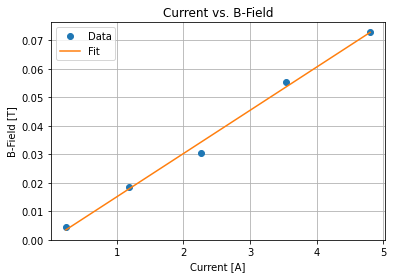

In [11]:
def resistance(V, I):
    R = V/I
    return R

def mT_to_T(B):
    new_B = 0.001*B
    return new_B

def Tesla_to_Gauss(B):
    return B*1e4

def Gauss_to_Tesla(B):
    return B/1e4

voltage = np.array([1, 5, 10, 15, 20])
I = np.array([0.236, 1.184, 2.256, 3.533, 4.800])
B = np.array([4.40, 18.5, 30.5, 55.5, 72.8])
B_T = mT_to_T(B)

plt.figure(figsize=(6,4))
plt.plot(voltage, I,"o", label="Data")
m1,b1 = np.polyfit(voltage, I, 1)
I_fit = m1*voltage+b1
plt.plot(voltage, I_fit, label="Fit")
plt.title("Voltage vs. Current")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [A]")
plt.legend()
plt.grid()

plt.figure(figsize=(6,4))
m,b = np.polyfit(I, B_T, 1)
plt.plot(I, B_T, "o", label="Data")
B_fit = m*I+b
plt.plot(I, B_fit, label="Fit")
plt.title("Current vs. B-Field")
plt.xlabel("Current [A]")
plt.ylabel("B-Field [T]")
plt.legend()
plt.grid()

In [3]:
B_T

array([0.0044, 0.0185, 0.0305, 0.0555, 0.0728])

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200.]


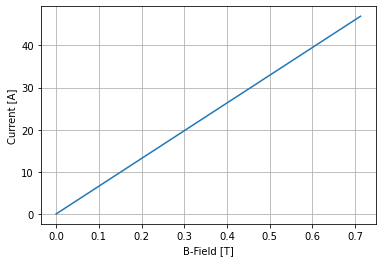

In [4]:
R = resistance(voltage, I)
avg = sum(R)/len(R)

new_volt = np.linspace(0, 200, 41)
print(new_volt)
calc_I = new_volt/avg
calc_B = calc_I*m
plt.plot(calc_B, calc_I)
plt.ylabel("Current [A]")
plt.xlabel("B-Field [T]")
plt.grid()

In [14]:
def calc_volt(I, R):
    return I*R

def data_test():
    ser_V = np.array([8.47, 16.52, 24.89, 32.62, 40.36])
    ser_I = np.array([1.00, 2.00, 3.00, 4.00, 5.00])
    ser_B = np.array([0.022, 0.043, 0.065, 0.087, 0.109])

    para_V = np.array([2.02, 4.04, 10.19, 14.05, 20.03, 23.93, 29.83])
    para_I = np.array([1.00, 2.00, 5.01, 7.01, 10.02, 12.02, 15.02])
    para_B = np.array([0.012, 0.023, 0.055, 0.077, 0.100, 0.129, 0.161])


    plt.figure()
    plt.plot(ser_V, ser_I,"ro", label="Series Data")
    plt.plot(para_V, para_I,"bo", label="Parallel Data")
    m1,b1 = np.polyfit(ser_V, ser_I, 1)
    ser_I_fit = m1*ser_V+b1
    m2,b2 = np.polyfit(para_V, para_I, 1)
    para_I_fit = m2*para_V+b2
    plt.plot(ser_V, ser_I_fit,"orange", label=" Series Fit")
    plt.plot(para_V, para_I_fit,"c", label="Parallel Fit")
    plt.xlabel("Voltage [V]", size=12)
    plt.ylabel("Current [A]", size=12)
    plt.title("Voltage vs. Current", size=18)
    plt.legend(fontsize="12")
    plt.grid()

    plt.figure()
    plt.plot(ser_I, ser_B,"ro", label="Series Data")
    plt.plot(para_I, para_B,"bo", label="Parallel Data")
    m3,b3 = np.polyfit(ser_I, ser_B, 1)
    ser_B_fit = m3*ser_I+b3
    m4,b4 = np.polyfit(para_I, para_B, 1)
    para_B_fit = m4*para_I+b4
    plt.plot(ser_I, ser_B_fit,"orange", label="Series Fit")
    plt.plot(para_I, para_B_fit,"c", label="Parallel Fit")
    plt.xlabel("Current [A]", size=12)
    plt.ylabel("B-Field [T]", size=12)
    plt.title("Current vs. B-Field", size=18)
    plt.legend(fontsize="12")
    plt.grid()
    
    R_series = 8.8 # ohms
    R_parallel = 2.20 # ohms
    current = np.linspace(1, 24, 24)
    print(current)
    
    volt_series = calc_volt(current, R_series)
    volt_parallel = calc_volt(current, R_parallel)
    
    plt.figure(figsize=(12,8))
    plt.plot(ser_V, ser_I,"ro", label="Series Data")
    plt.plot(para_V, para_I,"bo", label="Parallel Data")
    plt.plot(ser_V, ser_I_fit,"orange", label=" Series Fit")
    plt.plot(para_V, para_I_fit,"c", label="Parallel Fit")
    plt.plot(volt_parallel, current, label="Parallel Expect")
    plt.plot(volt_series, current, label="Series Expect")
    plt.xlabel("Voltage [V]", size=12)
    plt.ylabel("Current [A]", size=12)
    plt.title("Voltage vs. Current", size=18)
    plt.legend(fontsize="12")
    plt.grid()
    
    B_field_ser = m3*current+b3
    B_field_para = m4*current+b4
    print(m4*25+b4)
    
    plt.figure(figsize=(12,8))
    plt.plot(ser_I, ser_B,"ro", label="Series Data")
    plt.plot(para_I, para_B,"bo", label="Parallel Data")
    plt.plot(current, B_field_ser,"orange", label="Series B_field")
    plt.plot(current, B_field_para ,"c", label="Parallel B-field")
    plt.xlabel("Current [A]", size=12)
    plt.ylabel("B-Field [T]", size=12)
    plt.title("Current vs. B-Field", size=18)
    plt.legend(fontsize="12")
    plt.grid()

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]
0.26356774034945496


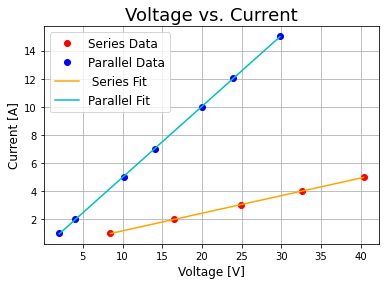

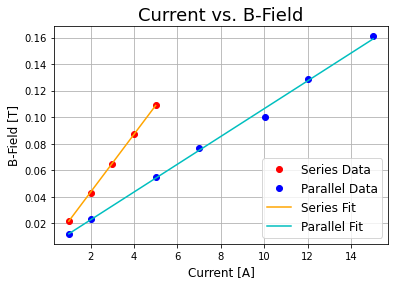

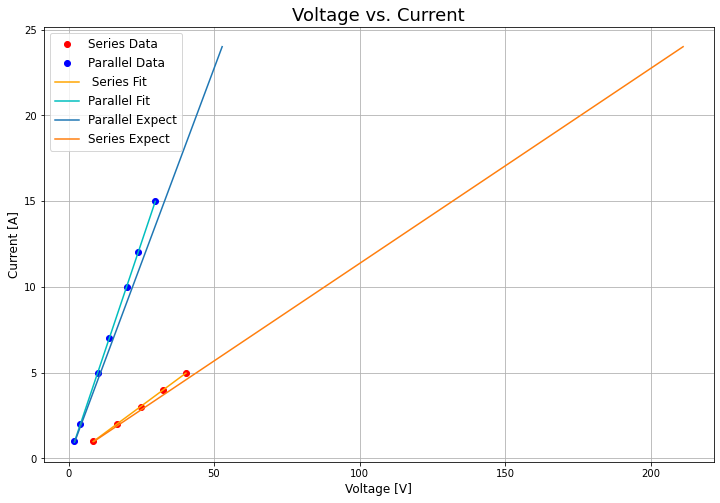

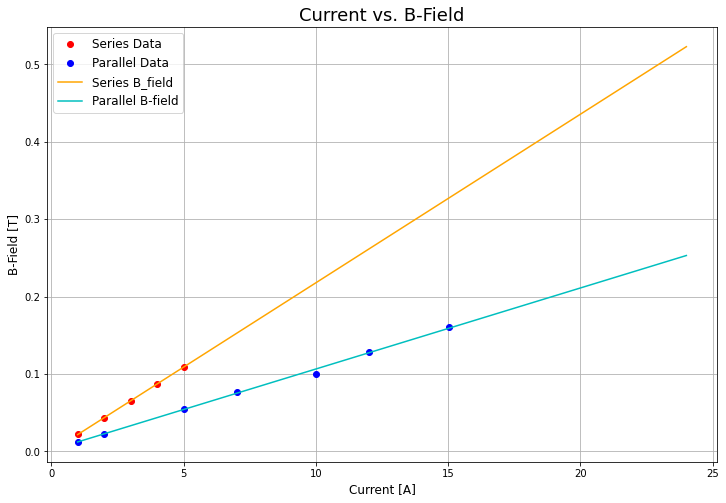

In [15]:
data_test()

In [16]:
def data_test2():
    para_V = np.array([2.06, 4.16, 8.25, 10.24, 16.25, 20.28, 24.40, 30.49, 36.78, 40.82, 45.96, 48.00])
    para_I = np.array([1.00, 2.00, 4.00, 5.00, 8.00, 10.00, 12.00, 15.00, 18.00, 20.00, 22.00, 24.00])
    para_B = np.array([0.049, 0.087, 0.171, 0.202, 0.313, 0.418, 0.494, 0.565, 0.646, 0.666, 0.682, 0.701])


    plt.figure()
    plt.plot(para_V, para_I,"bo", label="Parallel Data")
    m2,b2 = np.polyfit(para_V, para_I, 1)
    para_I_fit = m2*para_V+b2
    plt.plot(para_V, para_I_fit,"c", label="Parallel Fit")
    plt.xlabel("Voltage [V]", size=12)
    plt.ylabel("Current [A]", size=12)
    plt.title("Voltage vs. Current", size=18)
    plt.legend(fontsize="12")
    plt.grid()

    plt.figure()
    plt.plot(para_I, para_B,"bo", label="Parallel Data")
    m4,b4 = np.polyfit(para_I, para_B, 1)
    para_B_fit = m4*para_I+b4
    plt.plot(para_I, para_B_fit,"c", label="Parallel Fit")
    plt.xlabel("Current [A]", size=12)
    plt.ylabel("B-Field [T]", size=12)
    plt.title("Current vs. B-Field", size=18)
    plt.legend(fontsize="12")
    plt.grid()
    
    R_parallel = 2.20 # ohms
    current = np.linspace(1, 24, 24)
    print(current)
    
    volt_parallel = calc_volt(current, R_parallel)
    
    plt.figure(figsize=(12,8))
    plt.plot(para_V, para_I,"bo", label="Parallel Data")
    plt.plot(para_V, para_I_fit,"c", label="Parallel Fit")
    plt.plot(volt_parallel, current, label="Parallel Expect")
    plt.xlabel("Voltage [V]", size=12)
    plt.ylabel("Current [A]", size=12)
    plt.title("Voltage vs. Current", size=18)
    plt.legend(fontsize="12")
    plt.grid()
    
    B_field_para = m4*current+b4

    plt.figure(figsize=(12,8))
    plt.plot(para_I, para_B,"bo", label="Parallel Data")
    plt.plot(current, B_field_para ,"c", label="Parallel B-field")
    plt.xlabel("Current [A]", size=12)
    plt.ylabel("B-Field [T]", size=12)
    plt.title("Current vs. B-Field", size=18)
    plt.legend(fontsize="12")
    plt.grid()

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]


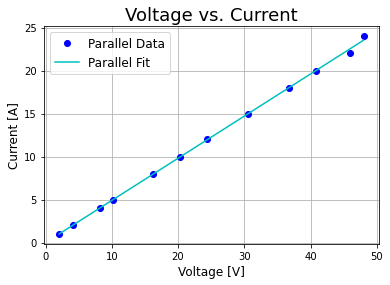

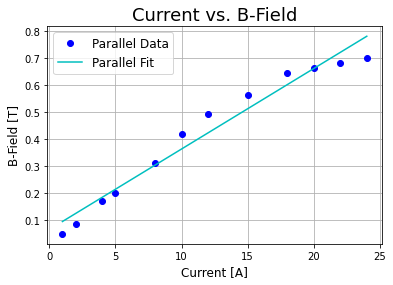

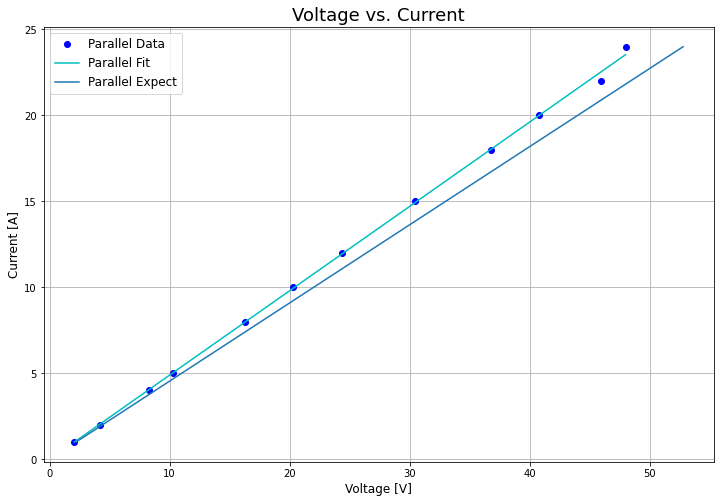

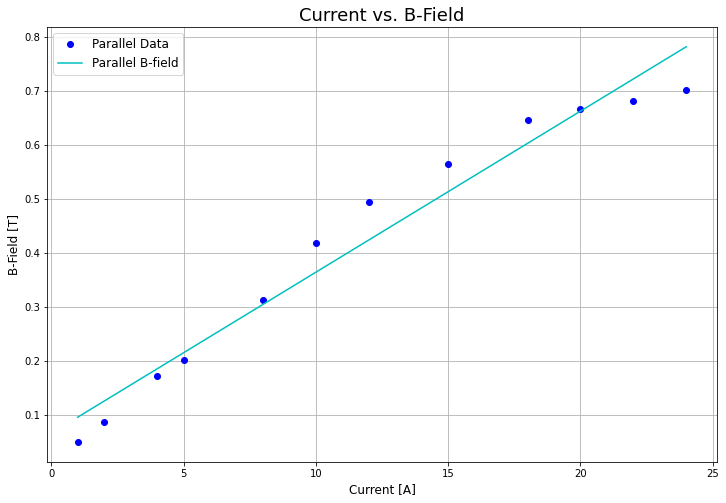

In [17]:
data_test2()